## Trying count vectorizor on sample dataset


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

text = [
  "Hello my name is james",
  "james this is my python notebook",
  "james of words to try differnt",
  "james trying to create a big dataset",
  "features of count vectorizer"
]
count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(text)
count_array=count_matrix.toarray()
print(count_vect.get_feature_names())
print(count_array)


['big', 'count', 'create', 'dataset', 'differnt', 'features', 'hello', 'is', 'james', 'my', 'name', 'notebook', 'of', 'python', 'this', 'to', 'try', 'trying', 'vectorizer', 'words']
[[0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0]
 [0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0]]


## tasks


1. Downloading twitter dataset to colab and processing tweets
2. testing with multinomial and decision tree classifier
3. measuring accuracy of them
4. tuning both models



[[738 324]
 [215 723]]
multinomial NB accuracy :  0.7305
[[631 315]
 [322 732]]
decision tree model accuracy :  0.6815


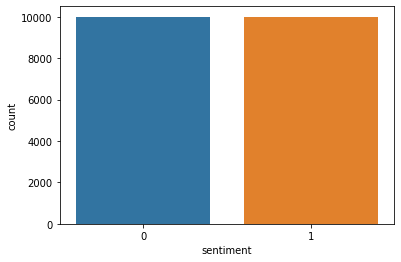

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

def calculateAccuracy(cmat):
  print(cmat)
  truth=sum(cmat[i][i] for i in range(len(cmat)))
  total=0
  for row in cmat:
    for elem in row:
      total+=elem
  return truth/total

def multinomialNBModeling(x_train, x_test, y_train, y_test):
  multinomial_model=MultinomialNB(alpha=0.01)
  multinomial_model.fit(x_train,y_train)
  y_pred=multinomial_model.predict(x_test)

  mat1=confusion_matrix(y_pred,y_test)
  print("multinomial NB accuracy : ",calculateAccuracy(mat1))

def dtModeling(x_train, x_test, y_train, y_test):
  new_model=DecisionTreeClassifier(random_state=0)
  new_model.fit(x_train,y_train)
  y_pred=new_model.predict(x_test)
  cmat=confusion_matrix(y_pred,y_test)
  print("decision tree model accuracy : ",calculateAccuracy(cmat))
  

columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("/content/drive/MyDrive/Sem6/ML/LAB6/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()
df["sentiment"] = df["sentiment"].replace(4,1)

back=df.iloc[-10000:]
front=df.iloc[:10000]
df = pd.concat([front,back])

count_vect=CountVectorizer()
count_matrix=count_vect.fit_transform(df['text'])
sns.countplot(x="sentiment",data=df)

x=count_matrix
y=df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.10, random_state =26105111)


multinomialNBModeling(x_train, x_test, y_train, y_test)
dtModeling(x_train, x_test, y_train, y_test)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
